# Media scenario and optimisation tool
## Table of Contents
1. [Chapter 1: Background and setup](#Chapter1)
<br>1.1 [Set up](#Set_up)
<br>1.2 [Defining functions](#definitions)
<br>1.3 [Calculating VWAP](#vwap)
2. [Chapter 2: Methodology for simulating revenue contrinutions](#Chapter2)
<br>2.1 [Simulating revenue contributions from model coefficients](#Revenue_contributions_model_coefficients)
<br>2.2 [Estimating relationship between input volume contributions](#input_volume_relationship)
3. [Chapter 3: Plotting response curves with fitted coefficients](#Chapter3)
4. [Chapter 4 : Generating Spend vs Revenue arrays](#Chapter4)
5. [Chapter 5 : Validating the results](#Chapter5)
6. [Chapter 6: Storing the results](#Chapter6)
7. [Chapter 7: Fitting the functions](#Chapter7)
8. [Chapter 8: Optimisation](#Chapter8)

# Chapter 1: Background and setup <a name="Chapter1"></a>

### Background information - defining the problem

Heineken has been one of the most successful companies in implementing efficient marketing strategies that drive revenue and ROI. In 2018, Heineken has tested multiple Individualised Data Driven Marketing (IDDM) campaigns, to support its Star Pubs & Bars customers with geo-targeted digital media, which proved to be incredibly successful. As a result, in 2020, IDDM was launched in nearly 30 markets, and Heineken has increased investments in video and audio streaming platforms, alongside with becoming more creative at bringing sponsorships into the virtual space, in order to drive e-commerce. The brewing giant doesn’t shy away from spending billions of pounds sterling on marketing and sales, in order to maintain its competitive position. In 2020, its marketing and sales budget reached £2.044 bln, and as the need to adapt faster to rising business challenges, like the unpredictable Covid-19 pandemic, there has never been a higher demand for efficient allocation of resources, and Data Science plays a crucial role in this process. 

One of the main sales metrics used by the company for measuring growth is volume of beverage sold, measured in millions of hectolitres (mhl). Heineken’s 2020 Annual Report announced a staggering 221.6 mhl of consolidated beer brands sold in 2020, and therefore predicting the effect of marketing efforts on volume growth is the main objective of the business.   

The Marketing Data Science team works alongside and guides the Media Planning and Brand Managers by providing with necessary support from a data perspective, to ensure budget decisions are validated by data modelling techniques. 

To support the work done by the Data Science team, Heineken has a series of existing tools available within the business, each of which have some limitations which block a more widespread adoption within its company:  

- Third party Marketing Mix Modelling(MMM) software tool provided by Mass Analytics. The tool is able to facilitate in defining the MMM suitable for Heineken brands. By inputting appropriate data, the tool is able to run appropriate transformations and simulations, and take into account factors like seasonality and n-degree multi variate synergies amongst variables, to assign appropriate coefficients to each element in the prediction model, that would accurately explain the variance in Volume of beer sold. One of the key challenges around the existing tool is the very high price of the license, and inherent black box approach, which limits the user from having visibility over transformations made to obtain model inputs. To alleviate this issue, the current project aims to decompose the current MMM model in order to derive those data transformations and use the MMM outputs for making better business decisions. 

- Third party demo scenario tool called Polestar, which is used by the media planning team to create various budget scenarios across different media channels. The challenges with this resource are its limitation in its ability to predict impact on volume or revenue or create scenarios for more than 2 brands within the company, as well as the fact that it cannot run an optimisation with suitable variable constraints for each media channel.

- Excel optimiser tool created by the Spanish Data Science team, which is not used by the UK stakeholders, as it’s not easily comprehensible or applicable to the brands owned by the UK business unit. 

The company’s motivation consists in creating a new media scenario and optimisation tool with a user-friendly interface, that is easily replicable across various brands, and which can recommend optimal split for marketing budgets. Ideally, internal stakeholders should be able to easily input their budget constraints in order to obtain a recommendation of media laydown strategy.

## MMM, response curves, and other terms defined...
Strategic marketing is key to a company’s success in the 21st century, and mastering this skill requires a unique blend of rational analysis, creativity and adaptability. (Kourdi, 2011) With an increased number of available media channels and marketing activities for promoting products and services, strategy is what creates the ultimate advantage. In order to determine the best course of action and the most efficient allocation of marketing resources in a competitive landscape, one must have a great understanding of the relative performance of each marketing metric, relative to brands belonging to the same category.  

Marketing Mix Modelling is the analytical approach to this challenge, and its purpose is to evaluate the Return on Investment (ROI) as a function of various marketing drivers and recommend the optimal marketing budget allocations. The model often uses regression methods to estimate the response in demand to marketing investments, by accounting for long-term trends, which are derived from customer preferences, distribution, prices and other factors; and also, by accounting for incremental volumes, which may depend on promotions and online and offline media activity.  

The process of allocating budgets is directly linked to the optimal reassignment of media resources, subject to a set of constraints, typically budget constraints. Maximising revenue by minimising the total budget spend requires a thorough analysis of media response curves, which are the most popular output of Marketing Mix Models (MMMs). (Cain, 2014) 

The type of effects that can have an impact on MMM are:

*The current effect* - is the impact that advertising has in the change in sales which is observed at the same time as the exposure period to the advertising itself.  

 

*The carryover effect* (Which is also known as Adstock Decay) is the impact if advertising that is recorded in periods of time after the exposure to advertising. This effect can be long, or short, and it can be caused by various aspects, for example: the consumer could make the purchase due to word of mouth from others who have been exposed to the ad, customers could have a slowed down response to the ad or even a delayed exposure from the moment of purchase of ad space (Print or TV have similar effects). 

 

*The Shape effect* (which we refer to as diminishing returns value) is the portrayal of the relationship between sales and increase in advertising effort over the same period of time. Therefore, it is important to note that in our future simulation, the response curve is a portrayal of the effect on sales from spending more marketing budget during the same period. This relationship can take various shapes, which can be linear, concave, convex or S-shaped. Linear and Convex are very unlikely in the real world scenarios, however Concave and S-Shapes are most like to correspond to the natural behaviour of advertising, given that marketing expenditure at very low-levels can have very little effect due ads getting drowned in the noise, whilst a marketing budget that is set at an exaggerated level can decrease the impact on sales, as consumers become fatigued from over-exposure to the same ad, and the market becomes saturated. Thus, a moderate level of advertising effort would lead to higher expected response in sales. 

 

*Competitive effects* are captured in the variables of our model that measure competitors' advertising. 

 

*Dynamic effects* are the advertising effects that change as time changes, defined by carryover effects, wearin, wearout and hysteresis. Wearin is when the response to revenue or sales increases week by week, as an advertising campaign is run at the same level weekly, wearout is when the response decreases from week to week, as a result of consumer tedium, and hysteresis is a permanent effect even after the campaign is no longer running, which is a very unlikely and rare event. 

 

*Content effects* are the response difference due to the variation in ad creatives.  

 

*Media effects* are the variations in response to advertising which are caused by contextual placement of the ad - for example which channel is an ad placed on TV, or which story is the ad next to in the newspaper. 

### 1.1 Set up <a name="Set_up"></a>

#### Setting up the packages that will be required for this tool

In [1]:
#checking we are running the correct python version
from platform import python_version
print(python_version())

3.8.10


In [2]:
#piece of code that will show all outputs of the code which is run in the same cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#importing packages
import pandas as pd
import numpy as np
import openpyxl
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit, minimize
import itertools
from nltk import flatten
import statistics
from scipy.stats import linregress
from scipy.interpolate import interp1d
from scipy.optimize import minimize

#setting this option so we can check all the rows of the dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

### 1.2 Defining the necessary functions <a name="definitions"></a>

All functions below must be run and they will produce no output for now.
<br> In order to be able to kick start the process of plotting curves, we would need the user to input the desired channel. 

In [3]:
#manually inputting which channel we are interested in plotting the curve for:
print('Enter Media Channel:')
#enter PVID & BVOD
channel=input()

Enter Media Channel:
PVID & BVOD


We define the Lag, Diminishing returns and Decay values for each media channel based on  information we already hold from the MMM and the details we derive from the Masster software tool:

In [4]:
#Defining the values for Lag, Diminishing returns and Decay
lag_values={'Cinema':1, 'FB':0, 'PVID & BVOD':3, 'Youtube':0, 'Print':1, 'Radio':2, 'Twitter':0, 'Partnership':3, 'TV 2017':0, 'TV 2018':0, 'B&D':1 }
decay_values={'Cinema':90, 'FB':90, 'PVID & BVOD':20, 'Youtube':80, 'Print':90, 'Radio':80, 'Twitter':80, 'Partnership':70, 'TV 2017':20, 'TV 2018':20, 'B&D':10 }
diminishing_returns_values={'Cinema':0.90, 'FB':0.75, 'PVID & BVOD':0.9, 'Youtube':0.95, 'Print':0.9, 'Radio':0.5, 'Twitter':0.85}
saturation_values={'Partnership':50, 'TV 2017':90, 'TV 2018':90, 'B&D':50 }
gamma_values={'Partnership':2, 'TV 2017':3, 'TV 2018':3, 'B&D':3 }


In [5]:
#Defining the function that will help return the variable coefficient from the Masster model:

def get_model_coefficient(channel):
    #getting the excel with model coefficients and clearing up the rest of the irrelevant data
    model_coefficients=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name='Model Coefficients')

    #Removing the current names of the columns and replacing with the first row as n ames of the columns. 
    model_coefficients=model_coefficients.rename(columns=model_coefficients.iloc[0])[1:]

    #Fitlering the 
    model_coefficients=model_coefficients[['Variables', 'Coefficient']]

    #getting the value of the coefficient for PVID and BVOD
    channel_coeff=model_coefficients['Coefficient'][int(model_coefficients[model_coefficients['Variables'].str.contains(channel)].index.values)]
    
    return channel_coeff

We have to remove any other columns in the excel file, and only retain the "Raw" and predicted volume values - "Y". This is for decomposing the model, irrespective of the date when the Raw input or predicted Y occured. 

In [6]:
#creating a function which will read and extract the information from the raw excel files
def get_main_dataframe(channel):
    
    #import the excel of the Y values
    df_Y=pd.read_excel(r'Fosters\Model prediction Y.xlsx',sheet_name='Model predictions')
    #import the excel of the model coefficients
    model_coefficients=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name='Model Coefficients')
    #Removing the current names of the columns and replacing with the first row as n ames of the columns. 
    model_coefficients=model_coefficients.rename(columns=model_coefficients.iloc[0])[1:]

    #import the excel of the Raw data for all channels
    df_excel=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name=f'Media Laydown - {channel}')
    df=df_excel.copy()
    
    channel_coeff=get_model_coefficient(channel)
    
    #determine whether the variable from the model is already taken as "Spend" or as "Impressions/Admissions/Impacts"
    #If it's 'impressions', then the impressions_per_pound will need to be computed based on the two columns of data (Spend vs Impressions) as this will be needed for later transformations
    x=model_coefficients['Variables'][int(model_coefficients[model_coefficients['Variables'].str.contains(channel)].index.values)]
    if "Spend" in x:
        raw_metric='Spend'
        impressions_per_pound=1 #setting to one, as it won't affect the Raw column if divided by 1 later on. This means there is no need for further transformation on X axis of the response curve
    elif 'Admissions' in x:
        raw_metric='Admissions'
        impressions_per_pound=(df.filter(regex=channel))
        impressions_per_pound=sum(impressions_per_pound.iloc[:,1])/sum(impressions_per_pound.iloc[:,0])
    elif 'Impacts' in x:
        raw_metric='Impacts'
        impressions_per_pound=(df.filter(regex=channel))
        impressions_per_pound=sum(impressions_per_pound.iloc[:,1])/sum(impressions_per_pound.iloc[:,0])
    elif 'TVR' in x:
        raw_metric='TVR'
        impressions_per_pound=(df.filter(regex=channel))
        impressions_per_pound=sum(impressions_per_pound.iloc[:,1])/sum(impressions_per_pound.iloc[:,0])
    else:
        raw_metric='Impressions'
        impressions_per_pound=(df.filter(regex=channel))
        impressions_per_pound=sum(impressions_per_pound.iloc[:,1])/sum(impressions_per_pound.iloc[:,0])
    
    #Filtering the Raw column from the decomposition excel file and concatenating with the actual Y values.
    #we must resolve the situations with 'Impressions or Spend' being considered as the simulated metric for various channels
    df_test=pd.concat([(pd.DataFrame(((df.filter(regex=channel)).filter(regex=raw_metric)).iloc[:,0]).set_axis(["Raw"], axis=1)), df_Y[['Y']].dropna()],axis=1)
    return df_test

###### This function will check for any NAN values in the df to ensure we won't run into any problems. If there's no NAN values, the same dataframe will return with no changes.

In [7]:
#in case the position of the columns is incorrect (i.e. there are Nan values within the dataset), we created the below function to test that the dataset is clean
def clean_df_empty(df_excel):

    #dropping the unnamed columns as they are empty 
    df_excel=df_excel[df_excel.columns.drop(list(df_excel.filter(regex='Unnamed')))]

    #dropping all columns that we don't need and renaming the dataframe
    df_excel=df_excel[['Raw', 'Y']]
    #df_clean=df

    #returning the position (index) of the first row that has NAN values. We are aiming to get rid of the rows with NAN values. And then we resave the df_clean
    try:
        pos = df_excel[df_excel.isnull().all(axis=1)].index[0]
        df_excel=df_excel.iloc[:pos]
    except: 
        print('None of the rows contain a NAN, returning same Dataframe')
    
    return df_excel



In [8]:
#function for generating all column transformations to account for lag effect, diminishing returns and decay
def get_all_columns(df):
    #new method
    df.loc[:,'Lag']=df.loc[:,'Raw'].shift(lag).ffill()
    #df['Lag']=df['Raw'].shift(lag).ffill()
    #selecting if it's TV or partnerships
    
    if channel in ['Partnership', 'TV 2017', 'TV 2018', 'B&D']:
        #create another column for Diminishing returns that will calculate the values based on the formula (1-exp(-dim_returns*Lag))
        for row in range(0,len(df.index)):
            df.loc[row,'Diminishing Returns']=(((df.loc[row,'Lag'])/((max_lag/100)))**gamma)/((((df.loc[row,'Lag'])/((max_lag/100)))**gamma)+(saturation**gamma))
    else:
        #create another column for Diminishing returns that will calculate the values based on the formula (1-exp(-dim_returns*Lag))
        df.loc[:,'Diminishing Returns']=(1.0-np.exp(-df.loc[:,'Lag']/dim_returns))

    #remove all nans and replace with zeroes
    df=df.fillna(0)

    #create another column for Decay that will calculate the values based on the formula: Decay[row]=Decay[row-1]*(1-decay/100)+Diminishing returns[row]
    df.loc[0, 'Decay']=df['Diminishing Returns'][0]
    for row in range(1,len(df.index)):
        df.loc[row, 'Decay']=df['Decay'][row-1]*(1-decay/100)+df['Diminishing Returns'][row]

    #getting the percentage change in PVID
    df['Percentage change in Y caused by PVID']=df['Decay']*channel_coeff

    #Adding the predicted Volume with the "impact" from the PVID media based on % change impact
    df['Y + PVID Media']=df['Y']+df['Percentage change in Y caused by PVID']

    #Creating columns for actual values of volumes by taking exponential of Y and Y+media and computing the difference
    df['exp(Y)']=np.exp(df['Y'])
    df['exp(Y + PVID Media)']=np.exp(df['Y + PVID Media'])
    df['Volume diff']=df['exp(Y + PVID Media)']-df['exp(Y)']
    return df

For TV, we require a new variable that will calculate the maximum value in the "Lag" column. This is to allow this value to be recalculated for every channel, and avoid for the curve to be a straight flat line.

In [9]:
#for TV we will need a fixed value for max lag column based on historical data in order to avoid the curve being a straight line:
def get_max_lag(df):
    df.loc[:,'Lag']=df.loc[:,'Raw'].shift(lag).ffill()
    max_lag_tv=df['Lag'].max()
    return max_lag_tv

The below function would be for extracting the values for lag, decay, diminishing returns, and for TV: saturation and gamma.  Diminishing returns will be calculated based on Max value in the raw column. 

In [10]:
#testing that the function works
df=get_main_dataframe(channel)

In [11]:
#extracting the lag, decay, diminishing returns values. for all TV, they will have to go through and IF function to extract saturation and gamma:
lag=lag_values.get(channel)
decay=decay_values.get(channel)
list1=["Partnership", "TV 2017","TV 2018" "B&D"]
if channel in list1:
    saturation=saturation_values.get(channel)
    gamma=gamma_values.get(channel)
else:
    dim_returns=(diminishing_returns_values.get(channel))*max(df['Raw'])

#### Reading the excel files

It is important that the empty lines at the top of the excel files be removed prior to uploading the data to Python. Only the names of the columns are important "Raw", "Y" (Predicted Volumes), etc. This way the algorithm will render the desired outcome.

In [12]:
#import the excel of the Y values
df_Y=pd.read_excel(r'Fosters\Model prediction Y.xlsx',sheet_name='Model predictions')
#import the excel of the model coefficients
model_coefficients=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name='Model Coefficients')
#Removing the current names of the columns and replacing with the first row as n ames of the columns. 
model_coefficients=model_coefficients.rename(columns=model_coefficients.iloc[0])[1:]

#import the excel of the Raw data for all channels
df_excel=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name=f'Media Laydown - {channel}')
df=df_excel.copy()

#import the sheet relatedc to volume contributions
volume_contributions=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name='Final Volume Contributions')

In [13]:
#determine whether the variable from the model is already taken as "Spend" or as "Impressions/Admissions/Impacts"
#If it's impressions, then the impressions per pound will need to be computed based on the two columns of data (Spend vs Impressions) as this will be needed for later transformations
x=model_coefficients['Variables'][int(model_coefficients[model_coefficients['Variables'].str.contains(channel)].index.values)]
if "Spend" in x:
    raw_metric='Spend'
    impressions_per_pound=1 #setting to one, as it won't affect the Raw column if divided by 1 later on. This means there is no need for further transformation on X axis of the response curve
elif 'Admissions' in x: 
    raw_metric='Admissions'
    impressions_per_pound=(df.filter(regex=channel))
    impressions_per_pound=sum(impressions_per_pound.iloc[:,1])/sum(impressions_per_pound.iloc[:,0])       
elif 'TVR' in x:
    raw_metric='TVR'
    impressions_per_pound=(df.filter(regex=channel))
    impressions_per_pound=sum(impressions_per_pound.iloc[:,1])/sum(impressions_per_pound.iloc[:,0])
else:
    raw_metric='Impressions'
    impressions_per_pound=(df.filter(regex=channel))
    impressions_per_pound=sum(impressions_per_pound.iloc[:,1])/sum(impressions_per_pound.iloc[:,0])

### 1.3 Calculating VWAP <a name="vwap"></a>

The below functions will extract the "Final Volume contributions" from the Masster exports in order to also calculate the Volume Average weighted price.

Calculating Volume weighted average price $VWAP = \frac{\sum {Price}*Volume}{\sum {Volume}}$

In [14]:
#defining functions for getting volume contributions (from the masster)
def get_Masster_final_volume_contributions(channel):
    #import the sheet relatedc to volume contributions
    volume_contributions=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name='Final Volume Contributions')
    
    #Removing the current names of the columns and replacing with the first row as n ames of the columns. 
    volume_contributions=volume_contributions.rename(columns=volume_contributions.iloc[0])[1:]

    #getting the value of the coefficient for PVID and BVOD
    volumes=flatten(volume_contributions.filter(regex=channel).values.tolist())
    
    return volumes

#defining functions for getting weighted average price for channel
def get_weighted_average_price(channel):
    
    volumes=get_Masster_final_volume_contributions(channel)
    
    #import the sheet related to prices
    prices=pd.read_excel(r'Fosters\Fosters APPL.xlsx') #historical data of average per liter

    #dropping the unnamed columns as they are empty 
    prices=prices[prices.columns.drop(list(prices.filter(regex='Unnamed')))]

    #cutting the unnecssary cells out
    prices=prices[['Date','APPL_FOSTERS']][:-1]

    #creating new column with Price x Volume 
    prices['Price x Volume']=prices['APPL_FOSTERS']*volumes

    #weighted average price 
    VWAP=sum(prices['Price x Volume'])/sum(volumes)
    
    return VWAP

In [15]:
df=get_main_dataframe(channel)

In [16]:
df=clean_df_empty(df)

None of the rows contain a NAN, returning same Dataframe


# Chapter 2: Methodology for simulating contributions <a name="Chapter2"></a>

Our MMM for Fosters is a log-linear mathematical formula. 
When taking the exponential of the dependent variable (Volume), we obtain a multiplicative model, which is suitable for Marketing Mix due to the fact that it takes into account synergy effects and the impact that each independent variable can have on one another. 

<br>Log linear models are defined by the general mathematical formula:
$ln(y) = \beta_0 + \beta_1*X_{Competitors} + \beta_2*X_{MediaChannel1} + \beta_3*X_{MediaChannel2} + ... + error$

<br> which would also be the equivalent of :
$Y = e^{\beta_0} * e^{\beta_1*X_{Competitors}} *e^{ \beta_2*X_{MediaChannel1}} * e^{\beta_3*X_{MediaChannel2}} * ... * e^{error}$

The coefficients 𝛃_(𝟎…𝒌) define the percentage increase (or decrease) in the response variable for every one-unit increase in the independent variable(s).
<br>We will use this principle to estimate the individual volume contributions of each media channel and plot the response curves, and compare the results against the volume contributions from the Masster tool.

### 2.1 Simulating revenue contributions based on model coefficients <a name="Revenue_contributions_model_coefficients"></a>

In order to be able to plot the response curves, we would need to simulate through various values of Raw inputs (note that Raw inputs can be impressions or raw spend), perform the necessary transformations and then save all the coresponding volume contributions for each input. By saving these, we can then transform the raw input back into raw spend (if the input is not already taken as raw spend), and we can convert volumes back to revenue contributions by applying multiplying by VWAP. 

In [17]:
#defining a function that will take the original raw data, generate the columns and populate the inputs and volumes list


def simulate_rev_contributions_with_model_coefficients(df,min_limit, max_limit, step_size):
    #create a new list that will store all the values trialled for the simulation
    raw_values=[]

    #creating empty list for revenue contributions
    revenue_contrib=[]

    #once a clean_df is generated with only Raw and Y columns we can do the following:
    #create a copy
    df_2=df[['Raw', 'Y']].copy()
    max_lag=get_max_lag(df_2)
    #fill the 'Raw' column with zero values
    df_2['Raw'].values[:]=0
    
    #defining a loop that will iterate through various numbers and simulate the inputs and volumes
    
    for i in range(min_limit,max_limit,step_size):
        
        #apending the raw_values with the i value
        raw_values.append(i)
        #Replacing first Raw value with i value as a test
        df_2.loc[0,'Raw']=i
    
        #use previously defined function to get all columns
        df_2=get_all_columns(df_2) #this will generate the VOlume contributions based on the % change logic, where 1 unit change in the independent variable defines the % change impact on Y 

        #convert volume contributions back to revenue contributions
        revenue_contrib.append((df_2.loc[:,'Volume diff']*(get_weighted_average_price(channel))).sum())
    
    #plot the response curves using Raw values and Volume contributions
    plt.plot(np.array(raw_values)/impressions_per_pound,revenue_contrib, label=channel)

    plt.xlabel('Raw values spend')
    plt.ylabel(f'{channel} contribution to revenue')
    plt.xticks(rotation=45)
    
    plt.ticklabel_format(style='plain')    # to prevent scientific notation.
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return plt.legend()
    
    

### 2.2 Estimating relationship between input variable and Masster volume contributions  <a name="input_volume_relationship"></a>

We estimate the linear relationship between the model input variables and the volume contributions for each channel. These volumes contributions are exported from the MassTer tool. 
The reason we do that is because our goal is actually to be able to re-create the Response curves by estimating the transformation that has been done in the background by the MassTer tool, in order to achieve the certain values the values for volume that it has exported. We do not have full information about how this transformation was done, however we do know that the relationship between the transformed input variable and volume is pretty linear. We are aiming to investigate this relationship and fit the best fitting curve that will define this relationship. We will use the curve coefficients, from hereon referred to as "fitted coefficients" to generate our own response curves.

In [18]:
#writing function to get coefficients for plotting volumes contributions as a function of Raw inputs for Spend
def get_spend_to_volume_coefficients(channel):
    #there's no need to go back to spend if the original model is based on impressions 
    
    #get volumes for this specific channel
    volumes=get_Masster_final_volume_contributions(channel)
    #apply the two previous functions
    df=get_main_dataframe(channel)
    df=get_all_columns(df)
    
    #assigning the 'original data' input values to a new variable called raw values method 2, in order to use it for plotting.
    model_inputs=df['Decay'][:-2]
    
    #applying the linregress function from scipy package to get a best fit curve and slope values between inputs for the model (Decay) and volume contributions
    res_method2=linregress(model_inputs, volumes)
    
    #Curve fit method will allow us to build a function for the y-line. We assume that the relationship between x and y is linear (based on the shape of the above)
    def func_m2(x, a, b):
        return a*x + b
    
    #Returns: popt : array Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized. 
    #pcov : 2d array The estimated covariance of popt. 
    popt, pcov = curve_fit(func_m2, model_inputs, volumes)
    #defining a and b. a is the slope of the fitted curve and b is the intercept.
    a, b = popt
    
    #fitting the y line function based on the newly defined a and b
    y_line = func_m2(np.array(model_inputs), a, b)
    
    #UNCOMMENT THIS IF YOU'D LIKE TO PLOT THE RELATIONSHIP
    #overlap the scatter plot with the fitted curve
    #plot the response curves using Raw values and Volume contributions
    plt.scatter(model_inputs,volumes, label=channel)
    plt.plot(model_inputs,y_line, label = 'fitted',  color="red") #the inputs are the decay values

    plt.xlabel('Transformed input variable (after lag, dim_returns and decay)')
    plt.ylabel(f'Volume contributions for {channel}')

    plt.ticklabel_format(style='plain')    # to prevent scientific notation.
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return print(f'R2 value is {res_method2[2]**2}'), a,b, print(f"The fitted curve for {channel} volumes is Y_volume_{channel}={a}*X_model_input(Decay)+{b}"), plt.legend()

    

In [19]:
#This function is for creating a function that would only generate the first few columns which include the Decay column
#We don't currently use this function often, but it is useful in certain situations where we only require to create transformations as far as the Decay column
def get_decay(df):
    #create another column for Lag that will shift the rows for the 'Raw' column by 'lag' number of rows
    df.loc[:,'Lag']=df.loc[:,'Raw'].shift(lag).ffill()
    #setting max)lag based on historical data
    #max_lag=get_max_lag(df)
    #selecting if it's TV or partnerships
    
    if channel in ['Partnership', 'TV 2017', 'TV 2018', 'B&D']:
        #create another column for Diminishing returns that will calculate the values based on the formula (1-exp(-dim_returns*Lag))
        for row in range(0,len(df.index)):
            df.loc[row,'Diminishing Returns']=(((df.loc[row,'Lag'])/((max_lag/100)))**gamma)/((((df.loc[row,'Lag'])/((max_lag/100)))**gamma)+(saturation**gamma))
    else:
        #create another column for Diminishing returns that will calculate the values based on the formula (1-exp(-dim_returns*Lag))
        df['Diminishing Returns']=(1.0-np.exp(-df['Lag']/dim_returns))

    #remove all nans and replace with zeroes
    df=df.fillna(0)

    #create another column for Decay that will calculate the values based on the formula: Decay[row]=Decay[row-1]*(1-decay/100)+Diminishing returns[row]
    df.loc[0, 'Decay']=df['Diminishing Returns'][0]
    for row in range(1,len(df.index)):
        df.loc[row, 'Decay']=df['Decay'][row-1]*(1-decay/100)+df['Diminishing Returns'][row]
  
    return df

<span style="color:blue">With this function, we will compute the A and B coefficients of the line that describes the linear relationship of obtaintaing volume contributions from "Decay" and "Raw" values </span>

We use these A and B coefficients to generate our own volume contributions, without the need to have the model prediction values Y. So we're essentially using this linear relationship between the transformed input variable and volume to check whether we can estimate the volume contributions without having to compute % change based on total volume of sales.

In [20]:
#creating a function that would only generate the first few columns which include the Decay column
def get_decay_and_fitted_volume_contrib(df):
    #create another column for Lag that will shift the rows for the 'Raw' column by 'lag' number of rows
    df.loc[:,'Lag']=df.loc[:,'Raw'].shift(lag).ffill()
    #setting max)lag based on historical data
    #max_lag=get_max_lag(df)
    #selecting if it's TV or partnerships
    
    if channel in ['Partnership', 'TV 2017', 'TV 2018', 'B&D']:
        #create another column for Diminishing returns that will calculate the values based on the formula (1-exp(-dim_returns*Lag))
        for row in range(0,len(df.index)):
            df.loc[row,'Diminishing Returns']=(((df.loc[row,'Lag'])/((max_lag/100)))**gamma)/((((df.loc[row,'Lag'])/((max_lag/100)))**gamma)+(saturation**gamma))
    else:
        #create another column for Diminishing returns that will calculate the values based on the formula (1-exp(-dim_returns*Lag))
        df['Diminishing Returns']=(1.0-np.exp(-df['Lag']/dim_returns))

    #remove all nans and replace with zeroes
    df=df.fillna(0)

    #create another column for Decay that will calculate the values based on the formula: Decay[row]=Decay[row-1]*(1-decay/100)+Diminishing returns[row]
    df.loc[0, 'Decay']=df['Diminishing Returns'][0]
    for row in range(1,len(df.index)):
        df.loc[row, 'Decay']=df['Decay'][row-1]*(1-decay/100)+df['Diminishing Returns'][row]
    
    df.loc[:,'Volume contributions']=df.loc[:,'Decay']*a+b
    return df

Using the above function, the below one does the extra step of simulating through various raw values, transforming the raw values into model inputs, and applies the linear relationship coefficients to predict volume contributions.

In [21]:
#simulating using the fitted coefficients
def simulate_rev_contributions_with_fitted_coefficients(df,min_limit, max_limit, step_size):
    
    
    #simulating the different predicted volume contributions (based on fitted curve that we derived):
    raw_values=[]
    revenue_contrib=[]
    
    #setting max)lag based on historical data (before running this function)

    #defining a loop that will iterate through various numbers and simulate the inputs and volumes
    #fill the 'Raw' column with zero values
    df['Raw'].values[:]=0
    for i in range(min_limit, max_limit, step_size):

        #apending the raw_values with the i value
        raw_values.append(i)
        #Replacing first Raw value with 1000 as a test
        df['Raw'][0]=i

        #use previously defined function to get all columns
        df=get_decay_and_fitted_volume_contrib(df)
        revenue_contrib.append((df['Volume contributions']*(get_weighted_average_price(channel))).sum())
        
    #plot the response curves using Raw values and Volume contributions
    plt.plot(np.array(raw_values)/impressions_per_pound,revenue_contrib, label=channel+" fitted coeff")

    plt.xlabel('Raw values Spend')
    plt.ylabel(f'{channel} contribution to revenue')
    plt.xticks(rotation=45)

    plt.ticklabel_format(style='plain')    # to prevent scientific notation.
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return plt.legend()

### Results for fitting linear relationships for each channel 
<br> The fitted curve for FB volumes is Y_volume_FB=140733.48603328745* X_model_input(Decay)+-346.9166082582542
<br> The fitted curve for Partnership volumes is Y_volume_Partnership=150916.77453607638* X_model_input(Decay)+1956.775500303672
<br> The fitted curve for Cinema volumes is Y_volume_Cinema=148839.8423502507* X_model_input(Decay)+76.80801873416658
<br> The fitted curve for Youtube volumes is Y_volume_Youtube=9688.937824636192* X_model_input(Decay)+-14.438753754923596
<br> The fitted curve for B&D volumes is Y_volume_B&D=77870.82628800542* X_model_input(Decay)+-55.69810867679644
<br> The fitted curve for Radio volumes is Y_volume_Radio=37660.45024218594* X_model_input(Decay)+-4.6306161320528645
<br> The fitted curve for PVID & BVOD volumes is Y_volume_PVID & BVOD=36017.00922043758* X_model_input(Decay)+-117.04570293226789
<br> The fitted curve for Print volumes is Y_volume_Print=213733.39328286887* X_model_input(Decay)+309.4359182569814
<br> The fitted curve for TV 2017 volumes is Y_volume_TV 2017=102026.71615953592* X_model_input(Decay)+-57.25562583712724
<br> The fitted curve for TV 2018 volumes is Y_volume_TV 2018=-1.681574445255678* X_model_input(Decay)+4.0651650605816245

# Chapter 3: Plotting response curves with fitted coefficients  <a name="Chapter3"></a>
### Final script for generating response curves for each channel 
Once all the above functions are all run, we can simply run the below in order to retrieve the coefficients for the fitted curves and plot the response curves for each individual channel. By running this block of code, we will be prompted to input the desired channel. However, if an iterative prcoess is desired, we would have to replace the input with a for loop that iterates through the list of desired channels.

Enter Media Channel:
PVID & BVOD
R2 value is 0.9962050837817108
The fitted curve for PVID & BVOD volumes is Y_volume_PVID & BVOD=36017.00922043758*X_model_input(Decay)+-117.04570293226789


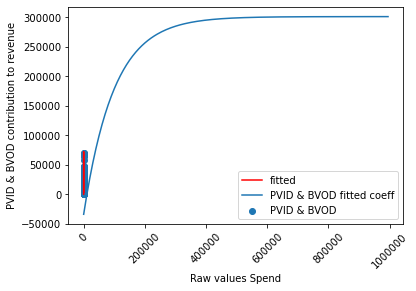

In [22]:
#final sequence of functions:
print('Enter Media Channel:')
#enter channel
channel=input()

#import the excel of the Y values
df_Y=pd.read_excel(r'Fosters\Model prediction Y.xlsx',sheet_name='Model predictions')
#import the excel of the model coefficients
model_coefficients=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name='Model Coefficients')
#Removing the current names of the columns and replacing with the first row as n ames of the columns. 
model_coefficients=model_coefficients.rename(columns=model_coefficients.iloc[0])[1:]

#import the excel of the Raw data for all channels
df_excel=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name=f'Media Laydown - {channel}')
df=df_excel.copy()

#import the sheet relatedc to volume contributions
volume_contributions=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name='Final Volume Contributions')

#determine whether the variable from the model is already taken as "Spend" or as "Impressions/Admissions/Impacts"
#If it's impressions, then the impressions per pound will need to be computed based on the two columns of data (Spend vs Impressions) as this will be needed for later transformations
x=model_coefficients['Variables'][int(model_coefficients[model_coefficients['Variables'].str.contains(channel)].index.values)]
# if "Spend" in x:
#     raw_metric='Spend'
#     impressions_per_pound=1 #setting to one, as it won't affect the Raw column if divided by 1 later on. This means there is no need for further transformation on X axis of the response curve
# else:
#     raw_metric='Impressions'
#     impressions_per_pound=(df.filter(regex=channel))
#     impressions_per_pound=sum(impressions_per_pound.iloc[:,1])/sum(impressions_per_pound.iloc[:,0])
if "Spend" in x:
    raw_metric='Spend'
    impressions_per_pound=1 #setting to one, as it won't affect the Raw column if divided by 1 later on. This means there is no need for further transformation on X axis of the response curve
elif 'Admissions' in x:
    raw_metric='Admissions'
    impressions_per_pound=(df.filter(regex=channel))
    impressions_per_pound=sum(impressions_per_pound.iloc[:,1])/sum(impressions_per_pound.iloc[:,0])       
elif 'TVR' in x:
    raw_metric='TVR'
    impressions_per_pound=(df.filter(regex=channel))
    impressions_per_pound=sum(impressions_per_pound.iloc[:,1])/sum(impressions_per_pound.iloc[:,0])
else:
    raw_metric='Impressions'
    impressions_per_pound=(df.filter(regex=channel))
    impressions_per_pound=sum(impressions_per_pound.iloc[:,1])/sum(impressions_per_pound.iloc[:,0])

#getting the value of the coefficient for the channel we are looking for
channel_coeff=get_model_coefficient(channel)

#The below function would be for extracting the values for lag, decay, diminishing returns, and for TV: saturation and gamma.  Diminishing returns will be calculated based on Max value in the raw column. 

#run the function
df=get_main_dataframe(channel)
max_lag=get_max_lag(df)
#extracting the lag, decay, diminishing returns values. for all TV, they will have to go through and IF function to extract saturation and gamma:
lag=lag_values.get(channel)
decay=decay_values.get(channel)
list1=["Partnership", "TV 2017","TV 2018", "B&D"]
if channel in list1:
    saturation=saturation_values.get(channel)
    gamma=gamma_values.get(channel)
else:
    dim_returns=(diminishing_returns_values.get(channel))*max(df['Raw'])

#creating a separation of min_value, max_value and sep size depending on impressions_per_pound value, in order to reduce response times for the code
if impressions_per_pound>35:
    VWAP = get_weighted_average_price(channel)
    #simulate_rev_contributions_with_model_coefficients(df,1,100000000, 500000)


    a_b_coefficients=get_spend_to_volume_coefficients(channel)


    #assigning slope to variable "a" and intercept to variable "b"
    a=a_b_coefficients[1]
    b=a_b_coefficients[2]

    simulate_rev_contributions_with_fitted_coefficients(df,1,100000000, 500000)

elif impressions_per_pound>0.01 and impressions_per_pound<35: 
    VWAP = get_weighted_average_price(channel)
    #simulate_rev_contributions_with_model_coefficients(df,1,10000, 100)


    a_b_coefficients=get_spend_to_volume_coefficients(channel)


    #assigning slope to variable "a" and intercept to variable "b"
    a=a_b_coefficients[1]
    b=a_b_coefficients[2]

    simulate_rev_contributions_with_fitted_coefficients(df,1,1000000, 5000)
else:
    VWAP = get_weighted_average_price(channel)
    #simulate_rev_contributions_with_model_coefficients(df,1,300, 2)


    a_b_coefficients=get_spend_to_volume_coefficients(channel)


    #assigning slope to variable "a" and intercept to variable "b"
    a=a_b_coefficients[1]
    b=a_b_coefficients[2]

    simulate_rev_contributions_with_fitted_coefficients(df,1,300, 2)
    

###### Method attempted but did not work: 
We tried implimenting this process of generating the response curve via all the steps of fitting the curve coefficients, however there are many variables that need to be defined in order for the function to run properly, so we will stick to the above method instead.

In [23]:
#this is the function that will run all the final functions together in order to get the response curve for each channel by fitting the curve from model coefficients. This function will not work if the channel_coefficient is not defined in advance
def get_response_curve_from_refitting_coefficients(channel):
#     #final sequence of functions:
#     print('Enter Media Channel:')
#     #enter channel
#     channel=input()
    #import the excel of the Y values
    df_Y=pd.read_excel(r'Fosters\Model prediction Y.xlsx',sheet_name='Model predictions')
    #import the excel of the model coefficients
    model_coefficients=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name='Model Coefficients')
    #Removing the current names of the columns and replacing with the first row as n ames of the columns. 
    model_coefficients=model_coefficients.rename(columns=model_coefficients.iloc[0])[1:]

    #import the excel of the Raw data for all channels
    df_excel=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name=f'Media Laydown - {channel}')
    df=df_excel.copy()

    #import the sheet relatedc to volume contributions
    volume_contributions=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name='Final Volume Contributions')

    #determine whether the variable from the model is already taken as "Spend" or as "Impressions/Admissions/Impacts"
    #If it's impressions, then the impressions per pound will need to be computed based on the two columns of data (Spend vs Impressions) as this will be needed for later transformations
    x=model_coefficients['Variables'][int(model_coefficients[model_coefficients['Variables'].str.contains(channel)].index.values)]
    if "Spend" in x:
        raw_metric='Spend'
        impressions_per_pound=1 #setting to one, as it won't affect the Raw column if divided by 1 later on. This means there is no need for further transformation on X axis of the response curve
    else:
        raw_metric='Impressions'
        impressions_per_pound=(df.filter(regex=channel))
        impressions_per_pound=sum(impressions_per_pound.iloc[:,1])/sum(impressions_per_pound.iloc[:,0])

    #getting the value of the coefficient for the channel we are looking for
    channel_coeff=get_model_coefficient(channel)

    #The below function would be for extracting the values for lag, decay, diminishing returns, and for TV: saturation and gamma.  Diminishing returns will be calculated based on Max value in the raw column. 

    #run the function
    df=get_main_dataframe(channel)
    max_lag=get_max_lag(df)
    #extracting the lag, decay, diminishing returns values. for all TV, they will have to go through and IF function to extract saturation and gamma:
    lag=lag_values.get(channel)
    decay=decay_values.get(channel)
    list1=["Partnership", "TV 2017","TV 2018", "B&D"]
    if channel in list1:
        saturation=saturation_values.get(channel)
        gamma=gamma_values.get(channel)
    else:
        dim_returns=(diminishing_returns_values.get(channel))*max(df['Raw'])

    #creating a separation of min_value, max_value and sep size depending on impressions_per_pound value, in order to reduce response times for the code
    if impressions_per_pound>35:
        VWAP = get_weighted_average_price(channel)
        #simulate_rev_contributions_with_model_coefficients(df,1,100000000, 500000)


        a_b_coefficients=get_spend_to_volume_coefficients(channel)


        #assigning slope to variable "a" and intercept to variable "b"
        a=a_b_coefficients[1]
        b=a_b_coefficients[2]

        simulate_rev_contributions_with_fitted_coefficients(df,1,100000000, 500000)

    elif impressions_per_pound>0.01 and impressions_per_pound<35: 
        VWAP = get_weighted_average_price(channel)
        #simulate_rev_contributions_with_model_coefficients(df,1,10000, 100)


        a_b_coefficients=get_spend_to_volume_coefficients(channel)


        #assigning slope to variable "a" and intercept to variable "b"
        a=a_b_coefficients[1]
        b=a_b_coefficients[2]

        simulate_rev_contributions_with_fitted_coefficients(df,1,1000000, 5000)
    else:
        VWAP = get_weighted_average_price(channel)
        #simulate_rev_contributions_with_model_coefficients(df,1,300, 2)


        a_b_coefficients=get_spend_to_volume_coefficients(channel)


        #assigning slope to variable "a" and intercept to variable "b"
        a=a_b_coefficients[1]
        b=a_b_coefficients[2]

        simulate_rev_contributions_with_fitted_coefficients(df,1,300, 2)
    return 

R2 value is 0.9962050837817108
The fitted curve for PVID & BVOD volumes is Y_volume_PVID & BVOD=36017.00922043758*X_model_input(Decay)+-117.04570293226789


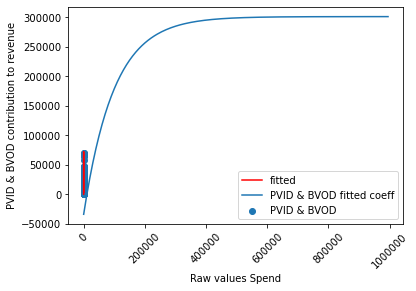

In [24]:
get_response_curve_from_refitting_coefficients(channel)

In [25]:
# simulate_rev_contributions_with_model_coefficients(df,1, 300, 1)
# simulate_rev_contributions_with_fitted_coefficients(df,1, 300, 1)

# Chapter 4 : Generating final arrays of Spend vs revenue  <a name="Chapter4"></a>

Generating the response curve, and creating an array of Raw values versus Revenue contributions. We convert all Raw values (if they are measured in impressions) back to Spend, and we convert volume contributions into revenue contributions. We plot the respective response curves. This is our final desired output.

To kickstart this process, we must get the main dataframe for the respective channel (in order to ensure that all the variables llike lag, dim_returns, decay are appropriate).

In [26]:
df=get_main_dataframe(channel)

In [27]:
def get_final_response_curve(channel):
    df=get_main_dataframe(channel)
    #simulating the different predicted volume contributions (based on fitted curve that we derived):
    raw_values=[]
    revenue_contrib=[]

   
    #defining a loop that will iterate through various numbers and simulate the inputs and volumes
    #fill the 'Raw' column with zero values
    df['Raw'].values[:]=0
    #we split the impression per pound depending on value, so that the code iterates faster. Otherwise we could just let it run for 1000000 iterations.
    if impressions_per_pound <0.001:
        i=1
        while (i/impressions_per_pound) <=1000000:
            raw_values.append(i/impressions_per_pound)
            #Replacing first Raw value with 1000 as a test
            df['Raw'][0]=i

            #use previously defined function to get all columns
            df=get_decay_and_fitted_volume_contrib(df)
            revenue_contrib.append((df['Volume contributions']*(get_weighted_average_price(channel))).sum())
            i+=1
    elif impressions_per_pound<50 and impressions_per_pound>0.001:
        i=1
        while (i/impressions_per_pound) <=1000000:
            raw_values.append(i/impressions_per_pound)
            #Replacing first Raw value with 1000 as a test
            df['Raw'][0]=i

            #use previously defined function to get all columns
            df=get_decay_and_fitted_volume_contrib(df)
            revenue_contrib.append((df['Volume contributions']*(get_weighted_average_price(channel))).sum())
            i+=50000
    elif impressions_per_pound>50 and impressions_per_pound<500:
        i=1
        while (i/impressions_per_pound) <=1000000:
            raw_values.append(i/impressions_per_pound)
            #Replacing first Raw value with 1000 as a test
            df['Raw'][0]=i

            #use previously defined function to get all columns
            df=get_decay_and_fitted_volume_contrib(df)
            revenue_contrib.append((df['Volume contributions']*(get_weighted_average_price(channel))).sum())
            i+=500000
    else: 
        i=1
        while (i/impressions_per_pound) <=1000000:
            raw_values.append(i/impressions_per_pound)
            #Replacing first Raw value with 1000 as a test
            df['Raw'][0]=i

            #use previously defined function to get all columns
            df=get_decay_and_fitted_volume_contrib(df)
            revenue_contrib.append((df['Volume contributions']*(get_weighted_average_price(channel))).sum())
            i+=5000000
    #plot the response curves using Raw values and Volume contributions
#     plt.plot(raw_values,revenue_contrib, label=channel+" fitted coeff")

#     plt.xlabel('Raw values Spend')
#     plt.xticks(rotation=45)
#     plt.ylabel(f'{channel} contribution to revenue')

#     plt.ticklabel_format(style='plain')    # to prevent scientific not
#     plt.legend()
    res=[raw_values, revenue_contrib]
    return res
    

In [35]:
# version of the same function to generate more points for the curves:
def get_final_response_curve(channel):
    df=get_main_dataframe(channel)
    #simulating the different predicted volume contributions (based on fitted curve that we derived):
    raw_values=[]
    revenue_contrib=[]

   
    #defining a loop that will iterate through various numbers and simulate the inputs and volumes
    #fill the 'Raw' column with zero values
    df['Raw'].values[:]=0
    #we split the impression per pound depending on value, so that the code iterates faster. Otherwise we could just let it run for 1000000 iterations.
    if impressions_per_pound <0.001:
        i=1
        while (i/impressions_per_pound) <=1000000:
            raw_values.append(i/impressions_per_pound)
            #Replacing first Raw value with 1000 as a test
            df['Raw'][0]=i

            #use previously defined function to get all columns
            df=get_decay_and_fitted_volume_contrib(df)
            revenue_contrib.append((df['Volume contributions']*(get_weighted_average_price(channel))).sum())
            i+=1
#     elif impressions_per_pound<50 and impressions_per_pound>0.001:
#         i=1
#         while (i/impressions_per_pound) <=1000000:
#             raw_values.append(i/impressions_per_pound)
#             #Replacing first Raw value with 1000 as a test
#             df['Raw'][0]=i

#             #use previously defined function to get all columns
#             df=get_decay_and_fitted_volume_contrib(df)
#             revenue_contrib.append((df['Volume contributions']*(get_weighted_average_price(channel))).sum())
#             i+=50000
#     elif impressions_per_pound>50 and impressions_per_pound<500:
#         i=1
#         while (i/impressions_per_pound) <=1000000:
#             raw_values.append(i/impressions_per_pound)
#             #Replacing first Raw value with 1000 as a test
#             df['Raw'][0]=i

#             #use previously defined function to get all columns
#             df=get_decay_and_fitted_volume_contrib(df)
#             revenue_contrib.append((df['Volume contributions']*(get_weighted_average_price(channel))).sum())
#             i+=500000
    else: 
        i=1
        while (i/impressions_per_pound) <=1000000:
            raw_values.append(i/impressions_per_pound)
            #Replacing first Raw value with 1000 as a test
            df['Raw'][0]=i

            #use previously defined function to get all columns
            df=get_decay_and_fitted_volume_contrib(df)
            revenue_contrib.append((df['Volume contributions']*(get_weighted_average_price(channel))).sum())
            i+=5000
    #plot the response curves using Raw values and Volume contributions
#     plt.plot(raw_values,revenue_contrib, label=channel+" fitted coeff")

#     plt.xlabel('Raw values Spend')
#     plt.xticks(rotation=45)
#     plt.ylabel(f'{channel} contribution to revenue')

#     plt.ticklabel_format(style='plain')    # to prevent scientific not
#     plt.legend()
    res=[raw_values, revenue_contrib]
    return res
    

For generating dataframe names, to facilitate storing the results, this function has been created to automate the process based on channel names

In [29]:
#generate dataframe name for each channel so we can save results
def generate_df_per_channel_name(channel):
    name=f"df_{channel}"
    name=name.replace("&","")
    name=name.replace(" ","_")
    if "__" in name:
        name=name.replace("__", "_")
    else:
        pass
    return name

# Chapter 5 : Validating the results  <a name="Chapter5"></a>
In order to validate our curves, we must cross-check our outputs with the ones that we can export from the Masster tool. 
We use the excel exports to look at the shape of the curves. 

We create a function that will be used for transforming the data and generating the weekly curves from the Masster exported data.

In [30]:
#import the data
volume_contributions_2018_weekly=pd.read_excel(r'Fosters/Fosters - Cinema - Weekly - 2018.xlsx')

C:\Users\avramd01.HEIWAY\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [31]:
#function for generating the weekly response curves
def get_weekly_curves(volume_contributions_2018_weekly):
    max_values=[]
    #creating a loop that will check each column length in the dataframe and remove the irrelevant columns
    new_df=volume_contributions_2018_weekly.copy()

    #crate an empty list for columns to remove
    list_cols_to_remove=[]
    #iterate through each column of the df
    for i in volume_contributions_2018_weekly.columns:
        #crating a new list of elements within each column that is non NAN.
        newlist = [x for x in volume_contributions_2018_weekly[f'{i}'] if np.isnan(x) == False]

        #we count how many elements are in these new lists. We can observe from the excel that for any week where there is no investments, there are 3 rows of data still present, even if data=0
        if len(newlist)<=3:
            #append the list of columns to remove witht he name of the column that must be removed
            list_cols_to_remove.append(i)
        else:
            continue

    #We want to get the new dataframe with only the columns that have actually had market spend during those weeks
    new_df=new_df.drop(columns=list_cols_to_remove)  
    
    
    #Splitting the columns in X-columns (Spend) and Y columns (Incremental Sales)
    x_cols = [col for col in new_df.columns if ':Spend' in col]
    y_cols = [col for col in new_df.columns if ':Incremental Sales' in col]
    
    #plotting first column of X-columns list against first column of Y-column list
    for col in range(len(x_cols)):
        plt.plot(new_df[x_cols[col]],new_df[y_cols[col]], label=f'{x_cols[col]}')
        max_values.append(max(new_df[y_cols[col]])) #we add this step as we use it to test against our generated curves

    plt.xlabel('Weekly raw values Spend (£)')
    plt.xticks(rotation=45)
    plt.ylabel(f'{channel} contribution to revenue (£)')

    plt.ticklabel_format(style='plain')    # to prevent scientific not
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return print(f'Max Value on the curve is {max(max_values)}'), plt.show()

Example of testing the shape of the curves for Cinema:

2018 Cinema weekly curves
Max Value on the curve is 316295.6416977646


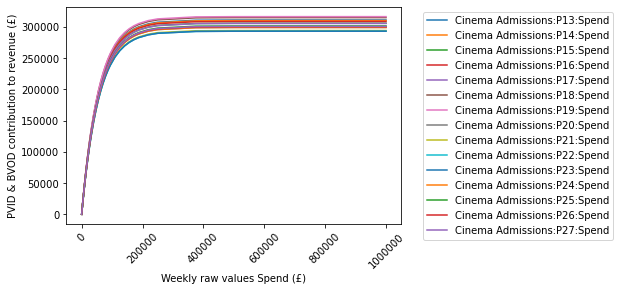

(None, None)

In [32]:
#plot the weekly Graphs for Cinema:
volume_contributions_2018_weekly=pd.read_excel(r'Fosters/Fosters - Cinema - Weekly - 2018.xlsx')

#the title of the graph will need to be amended each time
print("2018 Cinema weekly curves")
get_weekly_curves(volume_contributions_2018_weekly)

The shapes of the weekly curves are fairly similar, if not matching exactly, and therefore we can conclude that our process of generating weekly response curves is accurate and can be applied accross other brands too, provided other brands have an MMM model with similar variable inputs

# Chapter 6: Storing the results  <a name="Chapter6"></a>
### Writing the resulting dataframes of Spend vs Revenue in Excel for each channel to replicate the curves faster.

This Chapter will generate arrays of points for each channel in the "channel_list" list. This step is useful as we can then use these arrays to fit the functions that convert spend into revenue without having to re-run the previous codes. 
This steps is also useful as we can then use the excel output and feed it into the web app for faster processing.

Also, if the MMM model changes at any stage, or the user would like to re-generate the curves' fitted coefficients at a more granular level (more points to fit the curve), the above code could be easily amended by amending the simulation functions and decrease the step size:

simulate_rev_contributions_with_fitted_coefficients(df,1,100000000, 500000) -> simulate_rev_contributions_with_fitted_coefficients(df,1,100000000, 5000)

Otherwise, if the model doesn't change, and no changes are required to the number of points used for fitting the curves, the current version of the excel can be used.

R2 value is 0.9977616864779502
The fitted curve for B&D volumes is Y_volume_B&D=77870.82628800542*X_model_input(Decay)+-55.69810867679644
R2 value is 0.9962050837817108
The fitted curve for PVID & BVOD volumes is Y_volume_PVID & BVOD=36017.00922043758*X_model_input(Decay)+-117.04570293226789
R2 value is 0.9895560665226278
The fitted curve for FB volumes is Y_volume_FB=140733.48603328745*X_model_input(Decay)+-346.9166082582542


<ipython-input-35-2ee692558ece>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Raw'][0]=i


R2 value is 0.9978993534821475
The fitted curve for Radio volumes is Y_volume_Radio=37660.45024218594*X_model_input(Decay)+-4.6306161320528645


<ipython-input-35-2ee692558ece>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Raw'][0]=i


PermissionError: [Errno 13] Permission denied: 'Fosters\\Fosters Model - Decomposition - Raw TV.xlsx'

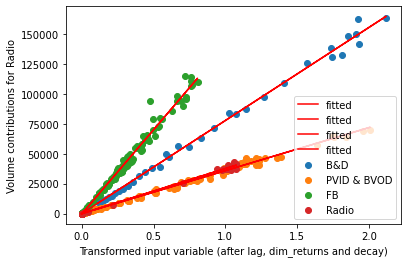

In [36]:
%%time
#saving a version of Excelw ith more points
#writing the dataframes of Spend vs Revenue arrays into excel and generating new sheets for each
channel_list=['B&D', 'PVID & BVOD', 'FB', 'Radio', 'Cinema', 'Youtube', 'Print', 'TV 2017', 'TV 2018']
writer = pd.ExcelWriter("all_results_2.xlsx")
for channel in channel_list:
    
    #get_response_curve_from_refitting_coefficients(channel)
    #going through the 
    
    #import the excel of the Y values
    df_Y=pd.read_excel(r'Fosters\Model prediction Y.xlsx',sheet_name='Model predictions')
    #import the excel of the model coefficients
    model_coefficients=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name='Model Coefficients')
    #Removing the current names of the columns and replacing with the first row as n ames of the columns. 
    model_coefficients=model_coefficients.rename(columns=model_coefficients.iloc[0])[1:]

    #import the excel of the Raw data for all channels
    df_excel=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name=f'Media Laydown - {channel}')
    df=df_excel.copy()

    #import the sheet relatedc to volume contributions
    volume_contributions=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name='Final Volume Contributions')

    #determine whether the variable from the model is already taken as "Spend" or as "Impressions/Admissions/Impacts"
    #If it's impressions, then the impressions per pound will need to be computed based on the two columns of data (Spend vs Impressions) as this will be needed for later transformations
    x=model_coefficients['Variables'][int(model_coefficients[model_coefficients['Variables'].str.contains(channel)].index.values)]
    if "Spend" in x:
        raw_metric='Spend'
        impressions_per_pound=1 #setting to one, as it won't affect the Raw column if divided by 1 later on. This means there is no need for further transformation on X axis of the response curve
    else:
        raw_metric='Impressions'
        impressions_per_pound=(df.filter(regex=channel))
        impressions_per_pound=sum(impressions_per_pound.iloc[:,1])/sum(impressions_per_pound.iloc[:,0])

    #getting the value of the coefficient for the channel we are looking for
    channel_coeff=get_model_coefficient(channel)

    #The below function would be for extracting the values for lag, decay, diminishing returns, and for TV: saturation and gamma.  Diminishing returns will be calculated based on Max value in the raw column. 

    #run the function
    df=get_main_dataframe(channel)
    max_lag=get_max_lag(df)
    #extracting the lag, decay, diminishing returns values. for all TV, they will have to go through and IF function to extract saturation and gamma:
    lag=lag_values.get(channel)
    decay=decay_values.get(channel)
    list1=["Partnership", "TV 2017","TV 2018","B&D"]
    if channel in list1:
        saturation=saturation_values.get(channel)
        gamma=gamma_values.get(channel)
    else:
        dim_returns=(diminishing_returns_values.get(channel))*max(df['Raw'])

    #creating a separation of min_value, max_value and sep size depending on impressions_per_pound value, in order to reduce response times for the code
    if impressions_per_pound>35:
        VWAP = get_weighted_average_price(channel)
        #simulate_rev_contributions_with_model_coefficients(df,1,100000000, 500000)


        a_b_coefficients=get_spend_to_volume_coefficients(channel)


        #assigning slope to variable "a" and intercept to variable "b"
        a=a_b_coefficients[1]
        b=a_b_coefficients[2]

        #simulate_rev_contributions_with_fitted_coefficients(df,1,100000000, 500000)

    elif impressions_per_pound>0.01 and impressions_per_pound<35: 
        VWAP = get_weighted_average_price(channel)
        #simulate_rev_contributions_with_model_coefficients(df,1,10000, 100)


        a_b_coefficients=get_spend_to_volume_coefficients(channel)


        #assigning slope to variable "a" and intercept to variable "b"
        a=a_b_coefficients[1]
        b=a_b_coefficients[2]

        #simulate_rev_contributions_with_fitted_coefficients(df,1,1000000, 5000)
    else:
        VWAP = get_weighted_average_price(channel)
        #simulate_rev_contributions_with_model_coefficients(df,1,300, 2)


        a_b_coefficients=get_spend_to_volume_coefficients(channel)


        #assigning slope to variable "a" and intercept to variable "b"
        a=a_b_coefficients[1]
        b=a_b_coefficients[2]

        #simulate_rev_contributions_with_fitted_coefficients(df,1,300, 2)
    
    #getting the response curve for the channel
    df=get_main_dataframe(channel)
    res=get_final_response_curve(channel)
    
    #generating a name for the dataframe containign the array of Spend vs Revenue
    name=generate_df_per_channel_name(channel)
    name=pd.DataFrame({'Raw Spend': res[0],
              'Revenue Contribution':(res[1]-min(res[1]))} ,#this step ensures that the curve is shifted upward to avoid it starting below 0 
             columns=['Raw Spend', 'Revenue Contribution'])
    
    
    # write dataframe to excel
    name.to_excel(writer, f"{channel}")
    # save the excel
writer.save()
writer.close()
print('DataFrame is written successfully to Excel File.')

In [ ]:
x

R2 value is 0.9977616864779502
The fitted curve for B&D volumes is Y_volume_B&D=77870.82628800542*X_model_input(Decay)+-55.69810867679644
R2 value is 0.9962050837817108
The fitted curve for PVID & BVOD volumes is Y_volume_PVID & BVOD=36017.00922043758*X_model_input(Decay)+-117.04570293226789


KeyboardInterrupt: 

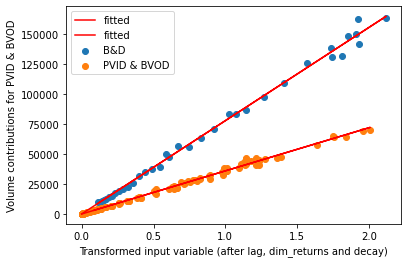

In [34]:
#version of the process that will run faster
#writing the dataframes of Spend vs Revenue arrays into excel and generating new sheets for each
channel_list=['B&D', 'PVID & BVOD', 'FB', 'Radio', 'Cinema', 'Youtube', 'Print', 'TV 2017', 'TV 2018']
writer = pd.ExcelWriter("all_results_2.xlsx")
for channel in channel_list:
    
    #get_response_curve_from_refitting_coefficients(channel)
    #going through the 
    
    #import the excel of the Y values
    df_Y=pd.read_excel(r'Fosters\Model prediction Y.xlsx',sheet_name='Model predictions')
    #import the excel of the model coefficients
    model_coefficients=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name='Model Coefficients')
    #Removing the current names of the columns and replacing with the first row as n ames of the columns. 
    model_coefficients=model_coefficients.rename(columns=model_coefficients.iloc[0])[1:]

    #import the excel of the Raw data for all channels
    df_excel=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name=f'Media Laydown - {channel}')
    df=df_excel.copy()

    #import the sheet relatedc to volume contributions
    volume_contributions=pd.read_excel(r'Fosters\Fosters Model - Decomposition - Raw TV.xlsx',sheet_name='Final Volume Contributions')

    #determine whether the variable from the model is already taken as "Spend" or as "Impressions/Admissions/Impacts"
    #If it's impressions, then the impressions per pound will need to be computed based on the two columns of data (Spend vs Impressions) as this will be needed for later transformations
    x=model_coefficients['Variables'][int(model_coefficients[model_coefficients['Variables'].str.contains(channel)].index.values)]
    if "Spend" in x:
        raw_metric='Spend'
        impressions_per_pound=1 #setting to one, as it won't affect the Raw column if divided by 1 later on. This means there is no need for further transformation on X axis of the response curve
    else:
        raw_metric='Impressions'
        impressions_per_pound=(df.filter(regex=channel))
        impressions_per_pound=sum(impressions_per_pound.iloc[:,1])/sum(impressions_per_pound.iloc[:,0])

    #getting the value of the coefficient for the channel we are looking for
    channel_coeff=get_model_coefficient(channel)

    #The below function would be for extracting the values for lag, decay, diminishing returns, and for TV: saturation and gamma.  Diminishing returns will be calculated based on Max value in the raw column. 

    #run the function
    df=get_main_dataframe(channel)
    max_lag=get_max_lag(df)
    #extracting the lag, decay, diminishing returns values. for all TV, they will have to go through and IF function to extract saturation and gamma:
    lag=lag_values.get(channel)
    decay=decay_values.get(channel)
    list1=["Partnership", "TV 2017","TV 2018","B&D"]
    if channel in list1:
        saturation=saturation_values.get(channel)
        gamma=gamma_values.get(channel)
    else:
        dim_returns=(diminishing_returns_values.get(channel))*max(df['Raw'])

    #creating a separation of min_value, max_value and sep size depending on impressions_per_pound value, in order to reduce response times for the code
    if impressions_per_pound>35:
        VWAP = get_weighted_average_price(channel)
        #simulate_rev_contributions_with_model_coefficients(df,1,100000000, 500000)


        a_b_coefficients=get_spend_to_volume_coefficients(channel)


        #assigning slope to variable "a" and intercept to variable "b"
        a=a_b_coefficients[1]
        b=a_b_coefficients[2]

        #simulate_rev_contributions_with_fitted_coefficients(df,1,100000000, 500000)

    elif impressions_per_pound>0.01 and impressions_per_pound<35: 
        VWAP = get_weighted_average_price(channel)
        #simulate_rev_contributions_with_model_coefficients(df,1,10000, 100)


        a_b_coefficients=get_spend_to_volume_coefficients(channel)


        #assigning slope to variable "a" and intercept to variable "b"
        a=a_b_coefficients[1]
        b=a_b_coefficients[2]

        #simulate_rev_contributions_with_fitted_coefficients(df,1,1000000, 5000)
    else:
        VWAP = get_weighted_average_price(channel)
        #simulate_rev_contributions_with_model_coefficients(df,1,300, 2)


        a_b_coefficients=get_spend_to_volume_coefficients(channel)


        #assigning slope to variable "a" and intercept to variable "b"
        a=a_b_coefficients[1]
        b=a_b_coefficients[2]

        #simulate_rev_contributions_with_fitted_coefficients(df,1,300, 2)
    
    #getting the response curve for the channel
    df=get_main_dataframe(channel)
    res=get_final_response_curve(channel)
    
    #generating a name for the dataframe containign the array of Spend vs Revenue
    name=generate_df_per_channel_name(channel)
    name=pd.DataFrame({'Raw Spend': res[0],
              'Revenue Contribution':(res[1]-min(res[1]))} ,#this step ensures that the curve is shifted upward to avoid it starting below 0 
             columns=['Raw Spend', 'Revenue Contribution'])
    
    
    # write dataframe to excel
    name.to_excel(writer, f"{channel}")
    # save the excel
writer.save()
writer.close()
print('DataFrame is written successfully to Excel File.')

# Chapter 7: Fitting the functions <a name="Chapter7"></a>

Once the arrays are generated as per chapter 4, we can proceed to use interpolation methods to fit the function that will calculate revenue, based on spend inputs.

### 7.1 Method 1 - Importing the arrays from the excel file in Chapter 6

In [ ]:
#read the excel file
df_results=pd.read_excel('all_results_2.xlsx', sheet_name=f'{channel}')

In [ ]:
#plotting the curves
plt.plot(df_results['Raw Spend'],df_results['Revenue Contribution'], label=channel+" fitted coeff")

plt.xlabel('Raw values Spend')
plt.xticks(rotation=45)
plt.ylabel(f'{channel} contribution to revenue')

plt.ticklabel_format(style='plain')    # to prevent scientific not

plt.legend()

In [ ]:
#fit the function using interpolation methods 
#NOTE that the name of the function will need to change for each channel selected:
PVID_BVOD_func=interp1d(df_results['Raw Spend'],df_results['Revenue Contribution'], fill_value="extrapolate")

Testing the new function to make sure it generates the same shape as in Chapter 4, and validated in Chapter 5:


In [ ]:
from matplotlib.ticker import FormatStrFormatter
#creating a series of x values (Spend):
x=range(1,1000000)

#plotting the new function:
fig2, ax2 = plt.subplots()
ax2.set_xlabel('Raw values Spend (£)')
ax2.set_xlim(0,1000000)

ax2.set_ylabel('Channels contribution to revenue (£)')
#rotating x-axis ticks
ax2.set_xticklabels(ax2.get_xticks(),rotation=40)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#work on this
ax2.ticklabel_format(style='plain', axis='y') #prevents scientific notation

ax2.plot(x, PVID_BVOD_func(x), label=channel)
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax2.set_title('Media channels Response curve');

Generating the rest of the response curves functions for all channels using this method of reading the Excel file for retrieving the arrays

In [ ]:
#create a function for reading the channels dataframes of Spend vs Revenue from Excel
def load_data(channel):
    
    df_results=pd.read_excel('all_results_2.xlsx', sheet_name=f'{channel}')
    return df_results


In [ ]:
#create functions for each of the channels based on the arrays of Raw values vs Revenue contributions from each channel in the dictionary

channel_list=['B&D', 'PVID & BVOD', 'FB', 'Radio', 'Cinema', 'Youtube', 'Print'] #list can be ammended based on desired iterations
all_functions={}
#manually defining the function names for each channel and storing the functions in a dictionary with the channel name as a Key
for channel in channel_list:
    df_results=load_data(channel)
    if channel=='Youtube':
        youtube_func=interp1d(df_results['Raw Spend'],df_results['Revenue Contribution'], fill_value="extrapolate")
        all_functions[channel]=youtube_func
    elif channel=='B&D':
        BD_func=interp1d(df_results['Raw Spend'],df_results['Revenue Contribution'], fill_value="extrapolate")
        all_functions[channel]=BD_func
    elif channel=='Cinema':
        cinema_func=interp1d(df_results['Raw Spend'],df_results['Revenue Contribution'], fill_value="extrapolate")
        all_functions[channel]=cinema_func
    elif channel=='Radio':
        radio_func=interp1d(df_results['Raw Spend'],df_results['Revenue Contribution'], fill_value="extrapolate")
        all_functions[channel]=radio_func
    elif channel=='FB':
        FB_func=interp1d(df_results['Raw Spend'],df_results['Revenue Contribution'], fill_value="extrapolate")
        all_functions[channel]=FB_func
    elif channel=='PVID & BVOD':
        PVID_BVOD_func=interp1d(df_results['Raw Spend'],df_results['Revenue Contribution'], fill_value="extrapolate")
        all_functions[channel]=PVID_BVOD_func
    elif channel=='Print':
        print_func=interp1d(df_results['Raw Spend'],df_results['Revenue Contribution'], fill_value="extrapolate")
        all_functions[channel]=print_func
    elif channel=='TV 2017':
        TV_2017_func=interp1d(df_results['Raw Spend'],df_results['Revenue Contribution'], fill_value="extrapolate")
        all_functions[channel]=TV_2017_func
    elif channel=='TV 2018':
        TV_2018_func=interp1d(df_results['Raw Spend'],df_results['Revenue Contribution'], fill_value="extrapolate")
        all_functions[channel]=TV_2018_func


fig2, ax2 = plt.subplots()
ax2.set_xlabel('Raw values Spend (£)')
ax2.set_xlim(0,1000000)

ax2.set_ylabel('Channels contribution to revenue (£)')
#rotating x-axis ticks
ax2.set_xticklabels(ax2.get_xticks(),rotation=40)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#work on this
ax2.ticklabel_format(style='plain', axis='y') #prevents scientific notation
x=range(1,1000000)
#definiting a function that would plot the response curve for each channel
def plot_fitted_funcs(channel):  
    
    ax2.plot(x, all_functions[channel](x), label=channel)
    #ax2.plot(x,(all_functions[channel](x)/x), label=f'ROI {channel}')
                # Put a legend to the right of the current axis
    ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    ax2.set_title('Media channels Response curve');
    return

#iterating through channel list and plotting response curves
for channel in channel_list:
    fig2=plot_fitted_funcs(channel)


### 7.2 Method 2: Running the function for computing the response curve array to generate the results and fit the curve

Before applying the get_final_response_curve function, we must apply the get_main_dataframe function, in order to derive the correct Lag values, correct dim_returns, etc. Otherwise the rest of the computations risk having some residues from other functions which were run in the past, and show some strange results.

Therefore Method 1 is advsied as being safer as less errors coudl occur during the process of re-running the algorithms

In [ ]:
df=get_main_dataframe(channel)

In [ ]:
channel

In [ ]:
%%time
#this function will generate the array of Spend & Revenue contributions to enable the curve to be plotted 
res=get_final_response_curve(channel)


In [ ]:
res

In [ ]:
#plotting the result of the function above
plt.plot(res[0],res[1]-min(res[1]), label=channel+" fitted coeff")

plt.xlabel('Raw values Spend')
plt.xticks(rotation=45)
plt.ylabel(f'{channel} contribution to revenue')

plt.ticklabel_format(style='plain')    # to prevent scientific not

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()

In [ ]:
#fit the function using interpolation methods 
#NOTE that the name of the function will need to change for each channel selected:
PVID_BVOD_func=interp1d(res[0],res[1]-min(res[1]), fill_value="extrapolate")

In [ ]:
#Testing the new function to make sure it generates the same shape as in Chapter 4, and validated in Chapter 5:


from matplotlib.ticker import FormatStrFormatter
#creating a series of x values (Spend):
x=range(1,1000000)

#plotting the new function:
fig2, ax2 = plt.subplots()
ax2.set_xlabel('Raw values Spend (£)')
ax2.set_xlim(0,1000000)

ax2.set_ylabel('Channels contribution to revenue (£)')
#rotating x-axis ticks
ax2.set_xticklabels(ax2.get_xticks(),rotation=40)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f')) #helps prevent some issues with the curves
ax2.ticklabel_format(style='plain', axis='y') #prevents scientific notation

ax2.plot(x, PVID_BVOD_func(x), label=channel) #change the function of the channel here ro reflect channel_function(x)
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax2.set_title('Media channels Response curve');

If we decide to go via this method, we would require to store all the results of the arrays in a dictionary, in order to be able to call back on the arrays for each channel from the dictionary

In [ ]:
res_PVID_BVOD=res.copy()

In [ ]:
all_res={'PVID & BVOD':res_PVID_BVOD}

In [ ]:
#create functions for each of the channels based on the arrays of Raw values vs Revenue contributions from each channel in the dictionary
# youtube_func=interp1d(all_res['Youtube'][0], (all_res['Youtube'][1]-min(all_res['Youtube'][1])), fill_value="extrapolate")
# BD_func=interp1d(all_res['B&D'][0], (all_res['B&D'][1]-min(all_res['B&D'][1])), fill_value="extrapolate")
# cinema_func=interp1d(all_res['Cinema'][0], (all_res['Cinema'][1]-min(all_res['Cinema'][1])), fill_value="extrapolate")
# radio_func=interp1d(all_res['Radio'][0],(all_res['Radio'][1]-min(all_res['Radio'][1])), fill_value='extrapolate')
# FB_func=interp1d(all_res['FB'][0],(all_res['FB'][1]-min(all_res['FB'][1])), fill_value='extrapolate')
PVID_BVOD_func=interp1d(all_res['PVID & BVOD'][0],(all_res['PVID & BVOD'][1]-min(all_res['PVID & BVOD'][1])), fill_value='extrapolate')
# print_func=interp1d(all_res['Print'][0],(all_res['Print'][1]-min(all_res['Print'][1])), fill_value='extrapolate')

In [ ]:
x=range(1,1000000)

In [ ]:
# plt.plot(x, youtube_func(x), label='Youtube')
# plt.plot(x, BD_func(x), label='B&D')
# plt.plot(x, cinema_func(x), label='Cinema')
# plt.plot(x, radio_func(x), label='Radio')
# plt.plot(x, FB_func(x), label='FB')
plt.plot(x, PVID_BVOD_func(x), label=f'{channel}')
# plt.plot(x, print_func(x), label='Print')

plt.xlabel('Weekly raw values Spend (£)')
plt.xticks(rotation=45)
plt.ylabel('Channels contribution to revenue (£)')

plt.ticklabel_format(style='plain')    # to prevent scientific not
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# Chapter 8: Optimisation <a name="Chapter8"></a>

### 8.1 Defining the objective function

OUr intention is to maximise revenue, however given we already derived revenue as an array in all_res['channel'][1] we can already deduct that maximising the sum of all revenue for all channels will be our objective function 

In [ ]:
from scipy.optimize import minimize

In [ ]:
#out intention is to maximise revenue. 
def total_revenue(spend_array):

    cinema_spend = spend_array[0]
    Youtube_spend = spend_array[1]
    BD_spend = spend_array[2]
    FB_spend = spend_array[3]
    radio_spend = spend_array[4]
    PVID_BVOD_spend = spend_array[5]
    print_spend = spend_array[6]
    
    return -(cinema_func(cinema_spend) + youtube_func(Youtube_spend) + BD_func(BD_spend)+ FB_func(FB_spend)+radio_func(radio_spend) + PVID_BVOD_func(PVID_BVOD_spend) + print_func(print_spend))

### 8.2 Define x0
<br>Scipy needs us to define an initial guess. For this type of optimisation it shouldn't matter too much. It's fine for the total revenue to be negative, because we are expecting it to be maxed - which is the negative of minmise.


In [ ]:
x0 = [5, 5, 5,5,5,5, 5]
type(x0)
total_revenue(x0)

### 8.3 Define bounds and constraints
<br> Our bounds are the max and min values each solution can have i.e. how much or little marketing is willing to spend in each stream

<br> Our constraint is that the solution vector cannot be higher than the total budget available

In [ ]:
#Define bounds for each channel
cinema_bounds = [0, 100000]
Youtube_bounds = [0, 100000]
BD_bounds = [0, 100000000]
FB_bounds = [0, 100000]
radio_bounds = [0, 100000]
PVID_BVOD_bounds = [0, 100000]
print_bounds = [0, 100000]

bounds = [cinema_bounds, Youtube_bounds, BD_bounds, FB_bounds, radio_bounds,PVID_BVOD_bounds, print_bounds]

We need to create a function to define our linear constraint.

This function will take the solution vector (our budget per stream) and ensure it's smaller than the budget

In [ ]:
budget = 2500000

def budget_constraint(spend_array):
    """constrain budget to always be >= spend"""
    return budget - sum(spend_array)

def ineq_constraint(x):
    """constrain all elements of x to be >= 0"""
    return x

constraints = [{
    'type' : 'ineq',
    'fun' : budget_constraint
},
    {'type': 'ineq', 
     'fun': ineq_constraint
    }]

#defining options which wil be used for setting maximum iterations
options = {'maxiter' : 10000}

### 8.4 Run the optimisation
Finally, we can run the minimize function with our objective function, initial guess, bounds and constraints!

In [ ]:
result = minimize(
    fun = total_revenue,
    x0 = x0,
    bounds = bounds,
    constraints = constraints,
    method = 'SLSQP',
    options=options
)
print(result)

In [ ]:
def summarise(result):
    print(f"Optimal Cinema budget = £{result.x[0]:.3f}")
    print(f"Optimal Youtube budget = £{result.x[1]:3f}")
    print(f"Optimal B&D budget = £{result.x[2]:.3f}")
    print(f"Optimal FB budget = £{result.x[3]:.3f}")
    print(f"Optimal Radio budget = £{result.x[4]:.3f}")
    print(f"Optimal PVID & BVOD budget = £{result.x[5]:.3f}")
    print(f"Optimal Print budget = £{result.x[6]:.3f}")
    print(40*"-")
    print(f"Max revenue = £{-total_revenue(result.x)}")
    print(40*"-")

In [ ]:
summarise(result)

### TESTING PHASE: Test the shape of the response curves if we shift the ,marketing investment along the different weeks :

In order to test out the behaviour of the response curves across different weeks of the year (to attempt to account for seasonality behaviour) we can simulate the process above for all weeks within our data set. The model prediction vlaues Y will be reflextive of the various behaviours within the market that cause fluctuations : Seasonality, market conditions, and other factors which may lead to a higher base of volume sales.

Below test is for Print:

In [ ]:
def get_final_response_curve_weekly(channel, week):
    df=get_main_dataframe(channel)
    #simulating the different predicted volume contributions (based on fitted curve that we derived):
    raw_values=[]
    revenue_contrib=[]

    #setting max)lag based on historical data (before running this function)

    #defining a loop that will iterate through various numbers and simulate the inputs and volumes
    #fill the 'Raw' column with zero values
    df['Raw'].values[:]=0
    if impressions_per_pound <0.001:
        i=1
        while (i/impressions_per_pound) <=1000000:
            raw_values.append(i/impressions_per_pound)
            #Replacing first Raw value with 1000 as a test
            df['Raw'][week]=i

            #use previously defined function to get all columns
            df=get_decay_and_fitted_volume_contrib(df)
            revenue_contrib.append((df['Volume contributions']*(get_weighted_average_price(channel))).sum())
            i+=1
    elif impressions_per_pound<50 and impressions_per_pound>0.001:
        i=1
        while (i/impressions_per_pound) <=1000000:
            raw_values.append(i/impressions_per_pound)
            #Replacing first Raw value with 1000 as a test
            df['Raw'][week]=i

            #use previously defined function to get all columns
            df=get_decay_and_fitted_volume_contrib(df)
            revenue_contrib.append((df['Volume contributions']*(get_weighted_average_price(channel))).sum())
            i+=50000
    elif impressions_per_pound>50 and impressions_per_pound<500:
        i=1
        while (i/impressions_per_pound) <=1000000:
            raw_values.append(i/impressions_per_pound)
            #Replacing first Raw value with 1000 as a test
            df['Raw'][week]=i

            #use previously defined function to get all columns
            df=get_decay_and_fitted_volume_contrib(df)
            revenue_contrib.append((df['Volume contributions']*(get_weighted_average_price(channel))).sum())
            i+=500000
    else: 
        i=1
        while (i/impressions_per_pound) <=1000000:
            raw_values.append(i/impressions_per_pound)
            #Replacing first Raw value with 1000 as a test
            df['Raw'][week]=i

            #use previously defined function to get all columns
            df=get_decay_and_fitted_volume_contrib(df)
            revenue_contrib.append((df['Volume contributions']*(get_weighted_average_price(channel))).sum())
            i+=5000000
    #plot the response curves using Raw values and Volume contributions
#     plt.plot(raw_values,revenue_contrib, label=channel+" fitted coeff")

#     plt.xlabel('Raw values Spend')
#     plt.xticks(rotation=45)
#     plt.ylabel(f'{channel} contribution to revenue')

#     plt.ticklabel_format(style='plain')    # to prevent scientific not
#     plt.legend()
    res=[raw_values, revenue_contrib]
    return res
    

In [ ]:
%%time
#plotting
fig, ax = plt.subplots()


ax.set_xlabel('Raw values Spend (£)')
ax.set_ylabel('Channels contribution to revenue (£)')

# labels = ax.set_xticklabels()
ax.set_xticklabels(ax.get_xticks(),rotation=40)

# Put a legend to the right of the current axis
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
#ax.set_title('PVID Response curve');

#plotting the actual curves:
for week in range(len(df)):
    res_test=get_final_response_curve_weekly(channel,week)
    
    ax.plot(res_test[0],res_test[1], label=channel+"_"+str(week))

fig.show()

In [ ]:
%%time
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
label_format = '{:,.2f}'
#plotting
fig, ax = plt.subplots()


ax.set_xlabel('Raw values Spend (£)')
ax.set_ylabel('Channels contribution to revenue (£)')

# labels = ax.set_xticklabels()
ax.set_xticklabels(ax.get_xticks(),rotation=40)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Put a legend to the right of the current axis
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
#ax.set_title('PVID Response curve');
ax.ticklabel_format(style='plain', axis='y')

# fixing xticks with matplotlib.ticker "FixedLocator"
# ticks_loc = ax.get_xticks().tolist()
# ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
# ax.set_xticklabels([label_format.format(x) for x in ticks_loc],rotation=40)

#ax.get_xaxis().set_minor_locator(mticker.ticker.AutoMinorLocator())

#plotting the actual curves:
for week in range(52,104,1):
    res_test=get_final_response_curve_weekly(channel,week)
    
    ax.plot(res_test[0],res_test[1], label=channel+"_"+str(week))

fig.show()

# References

- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). Springer Texts in Statistics An Introduction to Statistical Learning. http://www.springer.com/series/417 

- Johnson, D., Gupta, N. K., Bazari, P., & Mehndiratta, N. (2018). Exploring Granular Data in MMM: Updated Models, Better Insights. Accenture. 

- Ofir Chezy, & Khuri André. (1986). Multicollinearity in marketing models: Diagnostics and remedial measures. International Journal of Research in Marketing, 3(3), 181–205. 

- Poynter, R., Williams, N., & York, S. (2014). The Handbook of Mobile Market Research. In The Handbook of Mobile Market Research. John Wiley & Sons, Inc. https://doi.org/10.1002/9781119208198 